<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice3.png' width=300/></center>

<center>본 실습에서 요구하는 내용 외에도 다양한 내용을 스스로 추가하여  탐색하고 분석해 보기를 권고합니다.</center>

# 전국 아파트 평균 매매가격

<img src='https://raw.githubusercontent.com/Jangrae/img/master/apart.png' width="650" align="left">

## 1.환경 설정

- 데이터 탐색과 전처리를 하기 전 라이브러리와 파일을 읽어옵니다.
- 시각화에 한글이 포함된 경우 이에 대한 설정을 진행합니다.

**1) 한글 설정**

- Jupyter Notebook 시각화에 한글이 표시되게 설정합니다.

In [1]:
# 라이브러리 불러오기
import matplotlib 
import matplotlib.pyplot as plt

# 폰트설정
matplotlib.font_manager._rebuild()
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

**2) 라이브러리 불러오기**

- 사용할 라이브러리를 불러옵니다.

In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

**3) 데이터 읽어오기**

- 다음 경로의 파일을 읽어와 apart 데이터프레임을 만드세요.
- 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/apart_price.csv
- 단축 경로: 'https://bit.ly/ApartFile'
- Decoding 오류가 발생하면 encoding='CP949' 옵션을 지정해 읽어옵니다.

In [5]:
# 데이터 읽어오기
path = 'https://bit.ly/ApartFile'
A = pd.read_csv(path, encoding='CP949')

## 2.데이터 탐색

다음과 같은 정보 확인을 통해 처리할 대상 데이터를 이해합니다.
- 상/하위 데이터 확인
- 데이터프레임 크기 확인
- 열 이름, 데이터 형식, 값 개수 등 확인
- 기초 통계정보 확인
- 결측치 확인
- 범주형 데이터 확인
- 개별 열 값 상세 확인 등

**1) 상/하위 데이터 확인**

- 상/하위 데이터를 확인합니다.

In [6]:
# 상위 5개 행 확인
A.head()

,지역1,지역2,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07
0,서울,종로구,1029542,1033625,1036486,1036681,1037986,1039903,1041444,1044347,1045819,1047819,1048722,1050750
1,서울,중구,802257,806143,807771,808743,809900,812157,814614,820100,822257,823314,824371,829486
2,서울,용산구,1399354,1406439,1411232,1412659,1413768,1416951,1421012,1427366,1430780,1434768,1439390,1445073
3,서울,성동구,910716,916402,918667,920020,921108,923402,927029,934049,938029,940000,942235,947157
4,서울,광진구,1021037,1025866,1029256,1030878,1032220,1034524,1038378,1047439,1053024,1056524,1059476,1063805


In [7]:
# 하위 5개 행 확인
A.tail()

,지역1,지역2,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07
182,경남,밀양시,126455,126261,125989,125727,125773,125625,125977,126977,127614,127932,128364,129125
183,경남,거제시,155274,155921,156366,156543,156165,155616,156555,157811,159494,160220,160549,161079
184,경남,양산시,172574,172582,172828,173383,174672,181445,187973,191410,194660,197867,201191,204215
185,제주,제주시,303871,303757,303757,303800,303771,304414,306314,308871,310943,313814,324614,344400
186,제주,서귀포시,223087,222696,222196,221685,221457,221500,222043,222913,223370,224065,224913,231457


**2) 열 데이터 형식, 값 개수 확인**

- 어떤 열이 있고, 몇 개의 값들을 갖는지, 데이터 형식은 어떠한 지 확인합니다.

In [11]:
# 열 정보 확인
A.shape
A.info()
print(A.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역1      187 non-null    object
 1   지역2      187 non-null    object
 2   2020-08  187 non-null    int64 
 3   2020-09  187 non-null    int64 
 4   2020-10  187 non-null    int64 
 5   2020-11  187 non-null    int64 
 6   2020-12  187 non-null    int64 
 7   2021-01  187 non-null    int64 
 8   2021-02  187 non-null    int64 
 9   2021-03  187 non-null    int64 
 10  2021-04  187 non-null    int64 
 11  2021-05  187 non-null    int64 
 12  2021-06  187 non-null    int64 
 13  2021-07  187 non-null    int64 
dtypes: int64(12), object(2)
memory usage: 20.6+ KB
            2020-08       2020-09       2020-10       2020-11       2020-12  \
count  1.870000e+02  1.870000e+02  1.870000e+02  1.870000e+02  1.870000e+02   
mean   3.429660e+05  3.456397e+05  3.478531e+05  3.492826e+05  3.518816e+05   
std    2.83591

In [40]:
A.index

RangeIndex(start=0, stop=187, step=1)

**3) 결측치 확인**

- 결측치가 있는 지 확인합니다.

In [12]:
# 결측치 확인
A.isnull().sum()

지역1        0
지역2        0
2020-08    0
2020-09    0
2020-10    0
2020-11    0
2020-12    0
2021-01    0
2021-02    0
2021-03    0
2021-04    0
2021-05    0
2021-06    0
2021-07    0
dtype: int64

## 3.데이터 전처리
전처리 과정에서 다음과 같은 처리를 할 수 있습니다.

- 결측치 처리
- 값 변경
- 열 추가
- 불필요한 열 제거
- 열 이름 변경
- 데이터 통합(연결 또는 조인)
- 가변수화 등

**1) 열 이름 변경**

- 지역1, 지역2 열 이름을 각각 '시도', '구군'으로 변경합니다.

In [13]:
# 열 이름 변경
cols = {'지역1':'시도', '지역2':'구군'}
A.rename(columns=cols, inplace=True)
# 확인
A.head()

,시도,구군,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07
0,서울,종로구,1029542,1033625,1036486,1036681,1037986,1039903,1041444,1044347,1045819,1047819,1048722,1050750
1,서울,중구,802257,806143,807771,808743,809900,812157,814614,820100,822257,823314,824371,829486
2,서울,용산구,1399354,1406439,1411232,1412659,1413768,1416951,1421012,1427366,1430780,1434768,1439390,1445073
3,서울,성동구,910716,916402,918667,920020,921108,923402,927029,934049,938029,940000,942235,947157
4,서울,광진구,1021037,1025866,1029256,1030878,1032220,1034524,1038378,1047439,1053024,1056524,1059476,1063805


**2) 열 추가**

- 다음 공식을 사용해 '증가액', '증가율' 열을 추가합니다.

    - 증가액: 2021년 7월 가격 - 2020년 8월 가격
    - 증가율: (2021년 7월 가격 - 2020년 8월 가격) * 100 / 2020년 8월 가격

In [15]:
# 연간 증가액
A['증가액'] = A['2021-07'] - A['2020-08']

# 연간 증가율
A['증가율'] = A['증가액'] * 100 / A['2020-08']

# 확인
A.head()

,시도,구군,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,증가액,증가율
0,서울,종로구,1029542,1033625,1036486,1036681,1037986,1039903,1041444,1044347,1045819,1047819,1048722,1050750,21208,2.059945
1,서울,중구,802257,806143,807771,808743,809900,812157,814614,820100,822257,823314,824371,829486,27229,3.394050
2,서울,용산구,1399354,1406439,1411232,1412659,1413768,1416951,1421012,1427366,1430780,1434768,1439390,1445073,45719,3.267150
3,서울,성동구,910716,916402,918667,920020,921108,923402,927029,934049,938029,940000,942235,947157,36441,4.001357
4,서울,광진구,1021037,1025866,1029256,1030878,1032220,1034524,1038378,1047439,1053024,1056524,1059476,1063805,42768,4.188683


**3) 불필요한 열 제거**

- 시도, 구군, 증가액, 증가율 열만 추출하여 apart2 데이터프레임을 선언합니다.
- 이후 모든 작업은 apart2 데이터프레임을 대상으로 합니다.

In [30]:
# 분석 대상 열 지정
# A.drop(['2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05',
#              '2021-06', '2021-07'], axis=1, inplace=True)
A2 = A
# 확인
A2.head()

,시도,구군,증가액,증가율
0,서울,종로구,21208,2.059945
1,서울,중구,27229,3.394050
2,서울,용산구,45719,3.267150
3,서울,성동구,36441,4.001357
4,서울,광진구,42768,4.188683


In [57]:
A2.tail()

,시도,구군,증가액,증가율
182,경남,밀양시,2670,2.111423
183,경남,거제시,5805,3.738552
184,경남,양산시,31641,18.334743
185,제주,제주시,40529,13.337568
186,제주,서귀포시,8370,3.751899


## 4.데이터 분석

- 데이터를 집계하고 간단히 시각화하여 분석합니다.
- 연속형 값은 선 그래프, 범주형 값은 막대 그래프로 시각화함이 일반적입니다.

### 4.1.전국 분석

**1) 가격 변동 현황**

- 구군의 아파트 매매가 증가액을 막대 그래프로 시각화해 확인합니다.

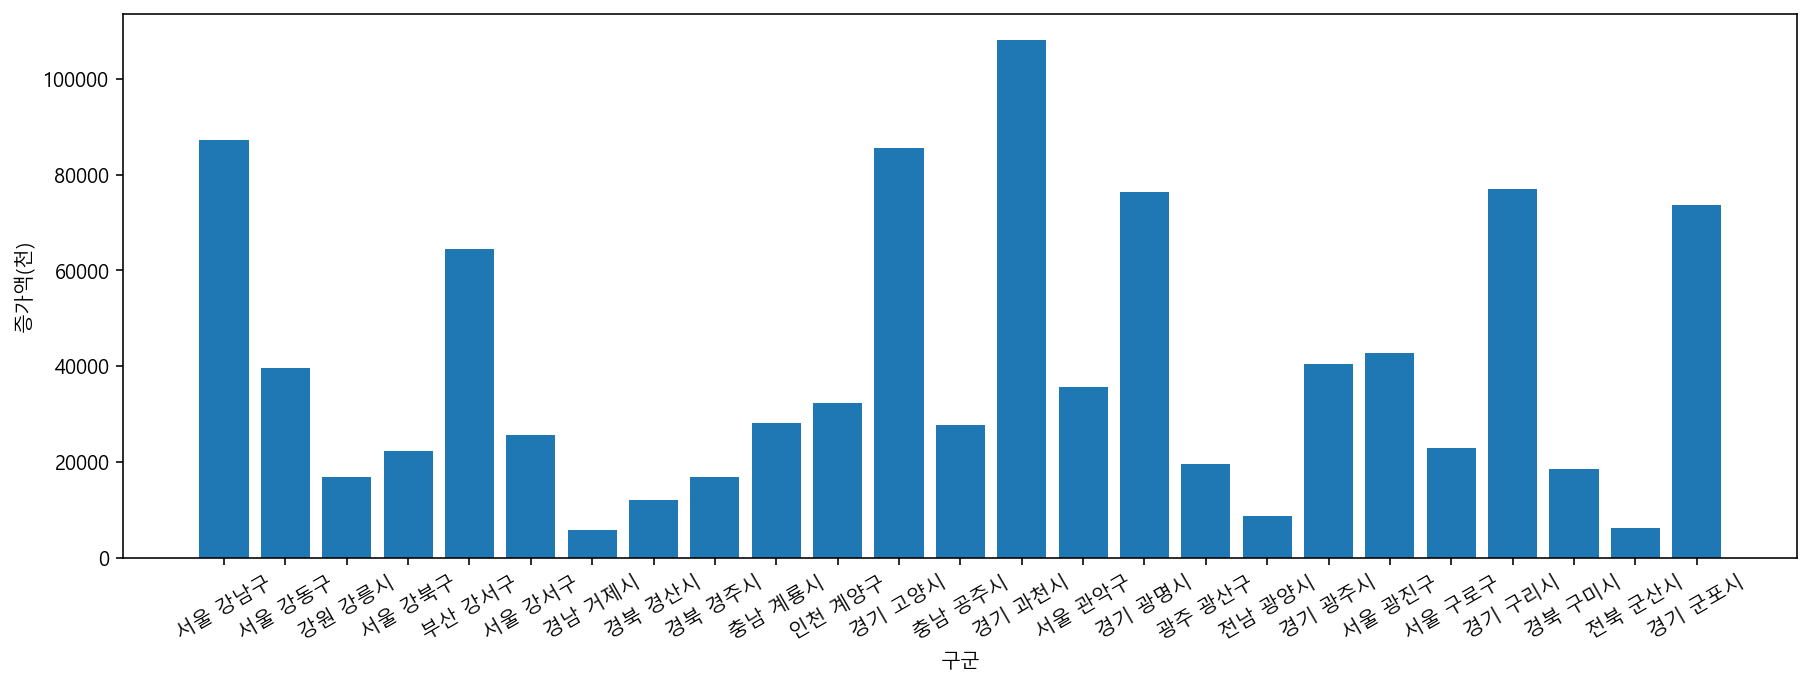

In [75]:
# 차트 그리기(25개)
tmp = A2.sort_values(by='구군', ascending=True).head(25)

plt.figure(figsize=(15,5))
plt.bar(tmp['시도']+' '+tmp['구군'], tmp['증가액'])
plt.xlabel('구군')
plt.ylabel('증가액(천)')
plt.xticks(rotation=30)
plt.show()



**2) 가격 변동 TOP 25**

- 증가액 기준으로 상위 25개 행을 추출해 tmp 데이터프레임을 선언합니다.

In [68]:
# 가격 변동 TOP 25
tmp = A2.sort_values(by='증가액', ascending=False).head(25)

# 확인
tmp.head()

,시도,구군,증가액,증가율
28,경기,동안구,144265,25.019033
34,경기,의왕시,141787,28.618515
99,대구,수성구,132345,25.655664
86,부산,해운대구,123977,30.789194
21,서울,서초구,122376,6.988865


- tmp 데이터프레임을 대상으로 구군별 매매가 증가액을 막대 그래프로 시각화해 확인합니다.

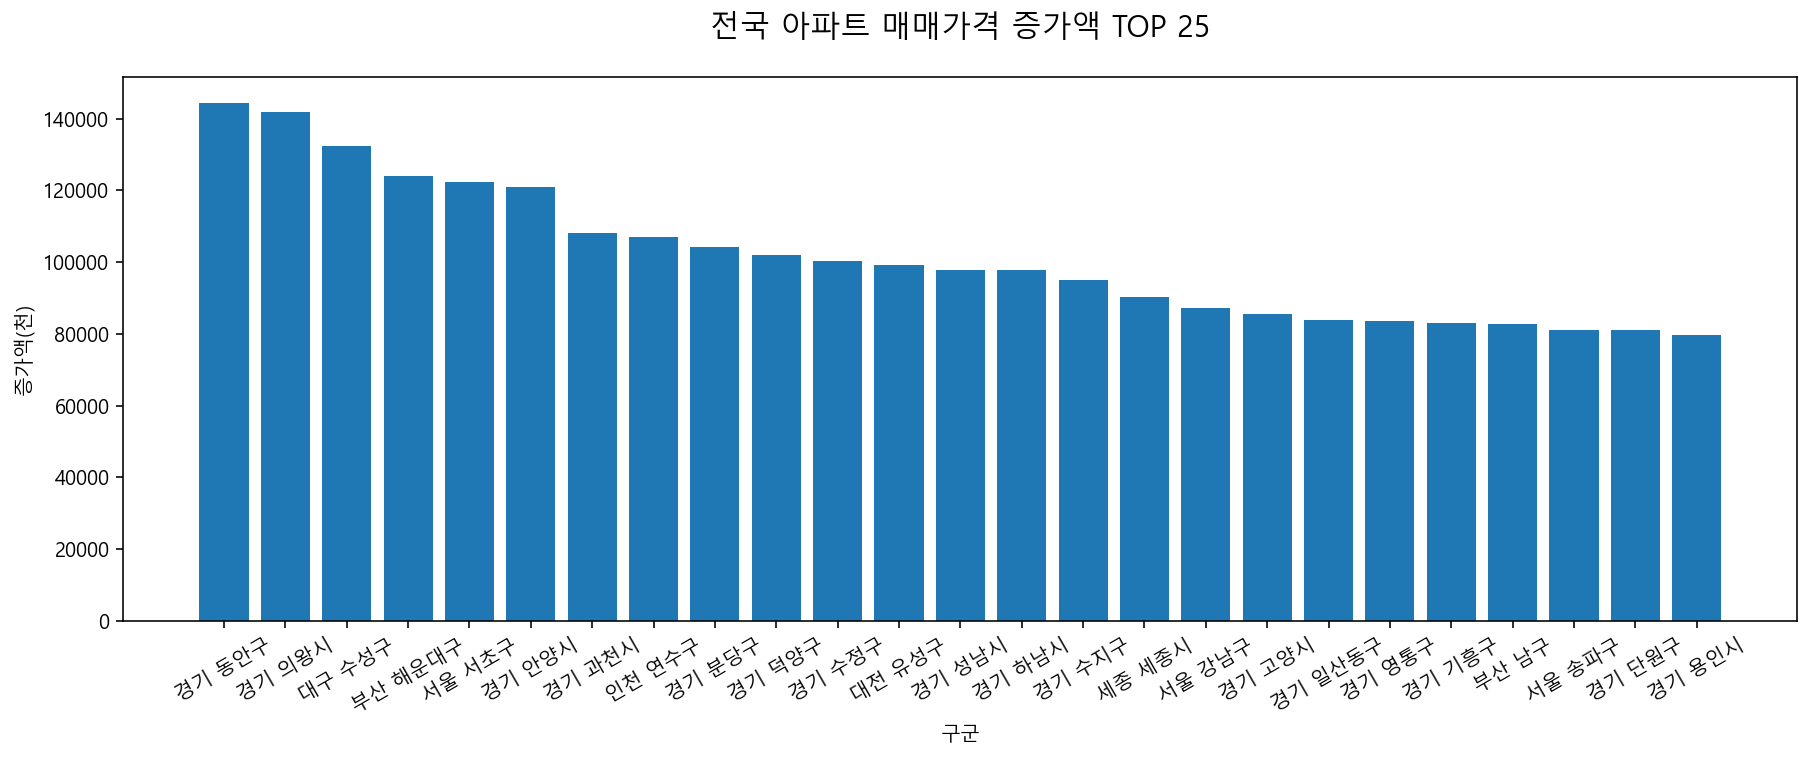

In [76]:
# 차트 그리기
tmp = A2.sort_values(by='증가액', ascending=False).head(25)

plt.figure(figsize=(15,5))
plt.bar(tmp['시도']+' '+tmp['구군'], tmp['증가액'])
plt.title('전국 아파트 매매가격 증가액 TOP 25', fontsize=15, pad=20)
plt.xlabel('구군')
plt.ylabel('증가액(천)')
plt.xticks(rotation=30)
plt.show()




**3) 가격 변동 BOTTOM 25**

- 증가액 기준으로 하위 25개 행을 추출해 tmp 데이터프레임을 선언합니다.

In [42]:
# 가격 변동 BOTTOM 25
tmp = A2.sort_values(by='증가액', ascending=False).tail(25)

# 확인
tmp.head()

,시도,구군,증가액,증가율
139,충남,서산시,7133,4.849808
123,강원,속초시,6652,4.845465
148,전북,군산시,6152,5.388881
183,경남,거제시,5805,3.738552
149,전북,익산시,4821,3.353739


- tmp 데이터프레임을 대상으로 구군별 매매가 증가액을 막대 그래프로 시각화해 확인합니다.

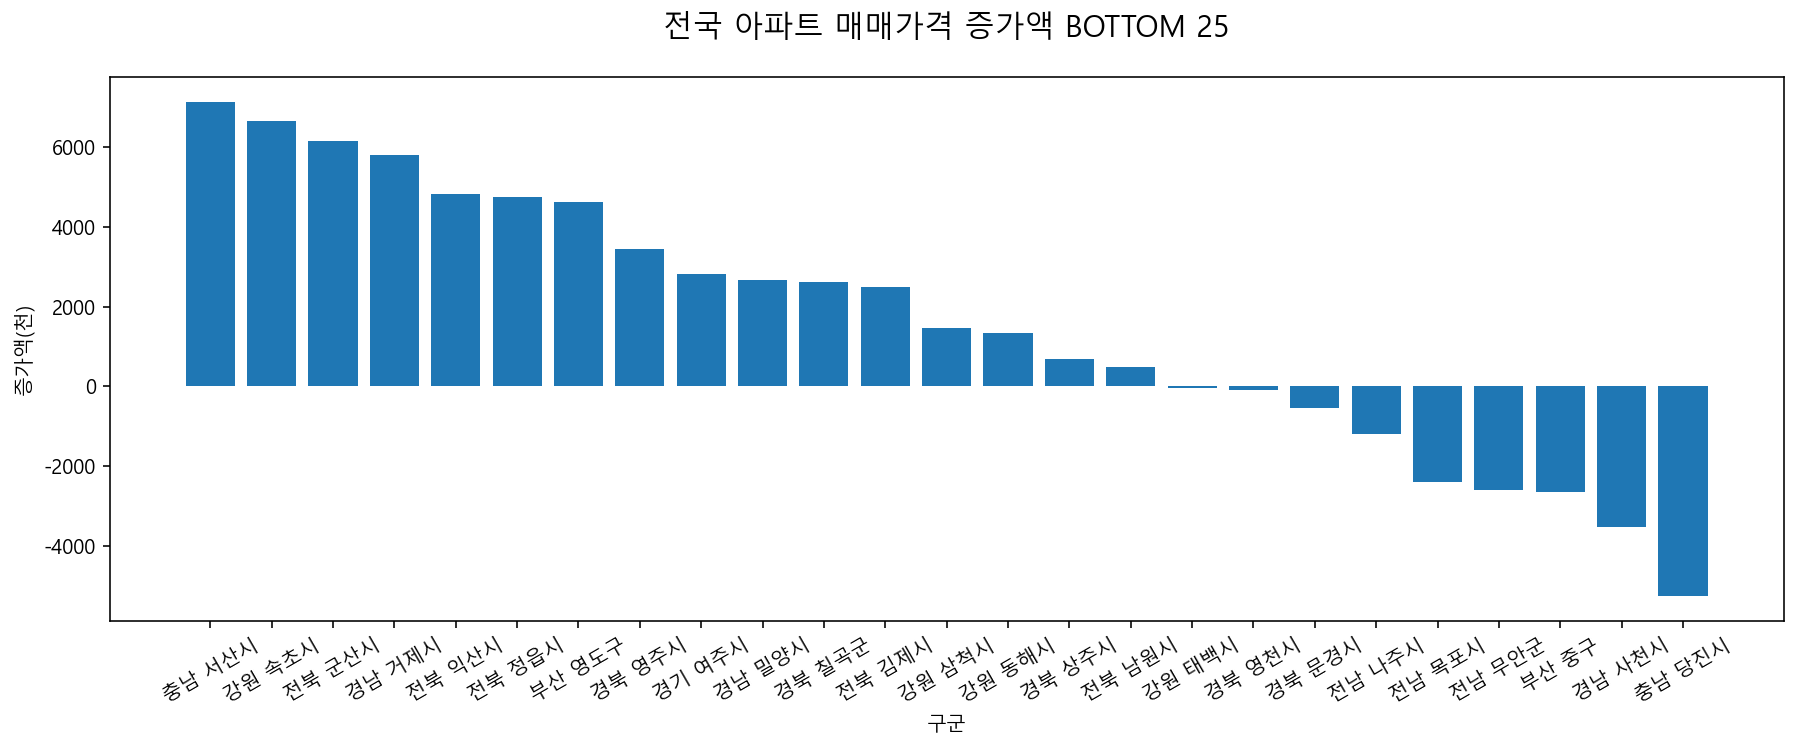

In [77]:
# 차트 그리기
tmp = A2.sort_values(by='증가액', ascending=False).tail(25)

plt.figure(figsize=(15,5))
plt.bar(tmp['시도']+' '+tmp['구군'], tmp['증가액'])
plt.title('전국 아파트 매매가격 증가액 BOTTOM 25', fontsize=15, pad=20)
plt.xlabel('구군')
plt.ylabel('증가액(천)')
plt.xticks(rotation=30)
plt.show()




**추가) 가격 변동률 TOP 20**

- 증가율 기준으로 상위 20개 행을 추출해 tmp 데이터프레임을 선언합니다.

In [69]:
tmp = A2.sort_values(by='증가율', ascending=False).head(20)

tmp

,시도,구군,증가액,증가율
86,부산,해운대구,123977,30.789194
34,경기,의왕시,141787,28.618515
62,경기,덕양구,101934,26.441543
99,대구,수성구,132345,25.655664
48,경기,단원구,81010,25.371442
49,경기,시흥시,71132,25.349513
46,경기,안산시,76376,25.107414
28,경기,동안구,144265,25.019033
47,경기,상록구,70329,24.721167
142,충남,홍성군,35511,23.855461


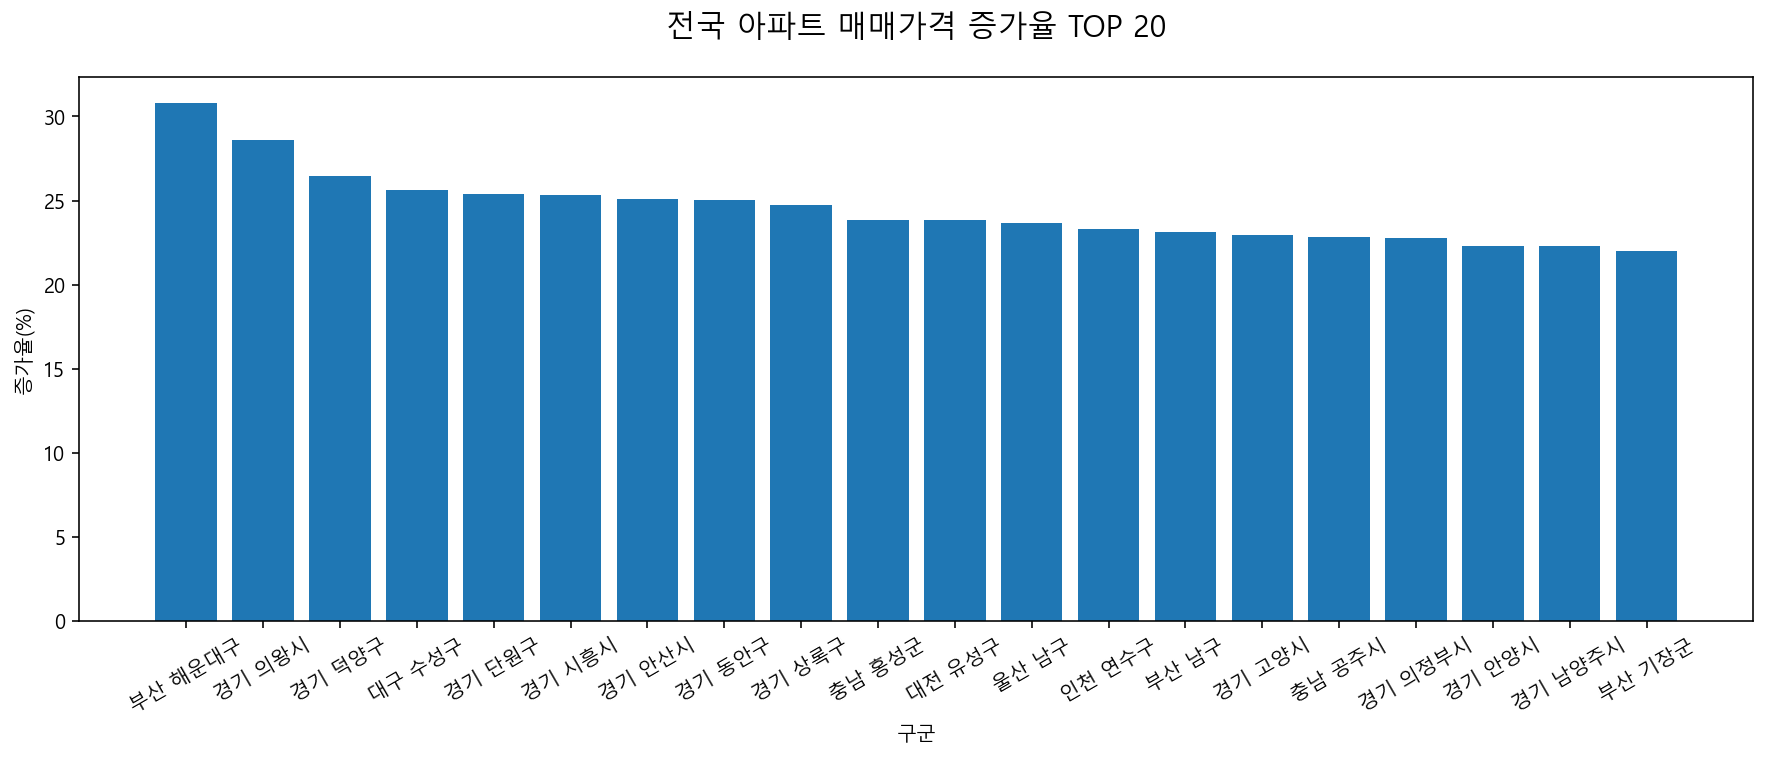

In [78]:
tmp = A2.sort_values(by='증가율', ascending=False).head(20)

plt.figure(figsize=(15,5))
plt.bar(tmp['시도']+' '+tmp['구군'], tmp['증가율'])
plt.title('전국 아파트 매매가격 증가율 TOP 20', fontsize=15, pad=20)
plt.xlabel('구군')
plt.ylabel('증가율(%)')
plt.xticks(rotation=30)
plt.show()

**추가2) 가격 변동률 BOTTOM 20**

- 증가율 기준으로 하위 20개 행을 추출해 tmp 데이터프레임을 선언합니다.

In [71]:
tmp = A2.sort_values(by='증가율', ascending=False).tail(20)

tmp

,시도,구군,증가액,증가율
166,경북,영주시,3444,2.937038
152,전북,김제시,2487,2.780697
171,경북,칠곡군,2620,2.517053
81,부산,영도구,4625,2.358286
59,경기,여주시,2808,2.133333
182,경남,밀양시,2670,2.111423
0,서울,종로구,21208,2.059945
124,강원,삼척시,1472,1.469546
121,강원,동해시,1334,1.250070
168,경북,상주시,677,0.501864


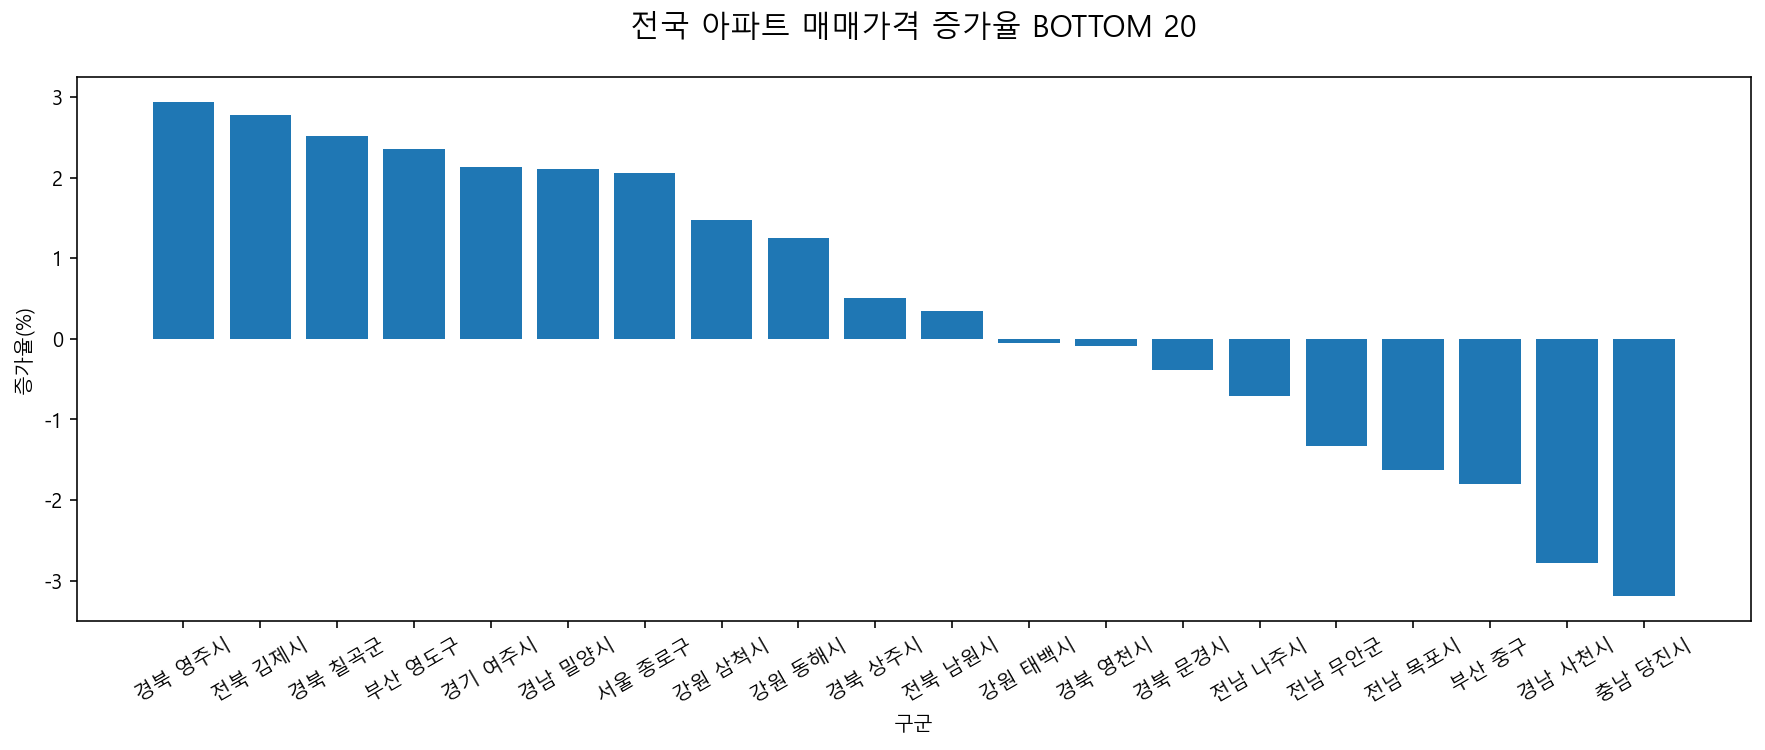

In [79]:
tmp = A2.sort_values(by='증가율', ascending=False).tail(20)

plt.figure(figsize=(15,5))
plt.bar(tmp['시도']+' '+tmp['구군'], tmp['증가율'])
plt.title('전국 아파트 매매가격 증가율 BOTTOM 20', fontsize=15, pad=20)
plt.xlabel('구군')
plt.ylabel('증가율(%)')
plt.xticks(rotation=30)
plt.show()

### 4.2.부산 지역 분석

**1) 부산 지역 데이터 추출**

- apart2 데이터프레임에서 부산지역 데이터만 추출해 새로운 데이터프레임을 선언합니다.

In [48]:
# 데이터프레임 만들기
A3 = A2.copy()

A3 = A3.loc[(A3['시도']=='부산')]

# 확인
A3

,시도,구군,증가액,증가율
78,부산,중구,-2645,-1.795253
79,부산,서구,29916,11.009053
80,부산,동구,20139,9.783480
81,부산,영도구,4625,2.358286
82,부산,부산진구,41122,15.904669
83,부산,남구,82844,23.103159
84,부산,연제구,75416,21.189210
85,부산,수영구,79132,18.347790
86,부산,해운대구,123977,30.789194
87,부산,금정구,50475,16.879182


**2) 부산 지역 가격 변동 현황**

- 부산 지역 아파트 매매가 증가액을 막대 그래프로 시각화해 확인합니다.

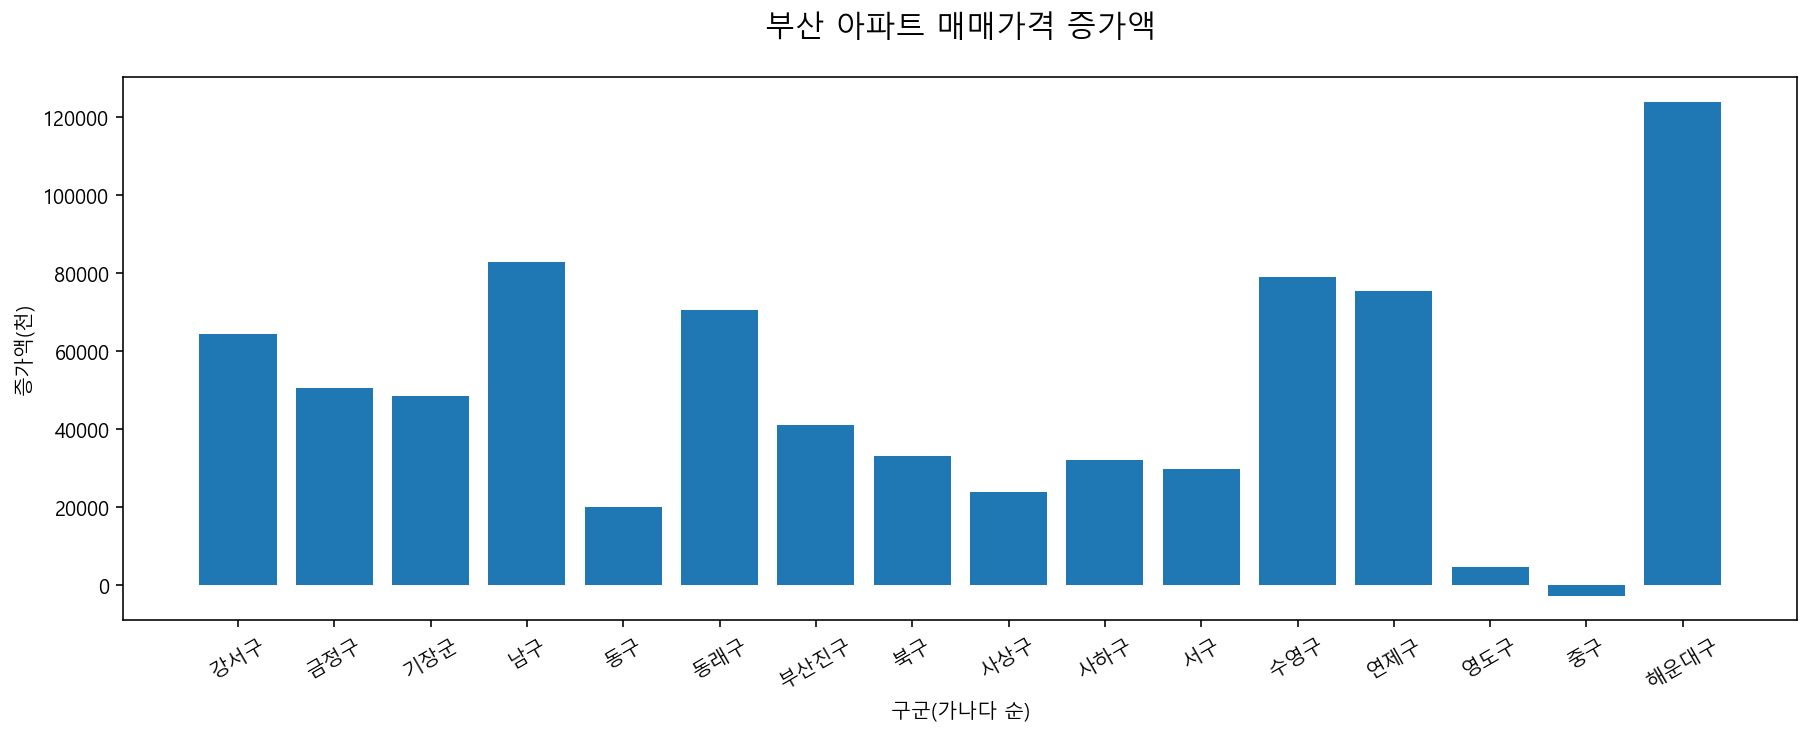

In [53]:
# 부산 지역 가격 변동
tmp = A3.sort_values(by='구군', ascending=True).head(25)

plt.figure(figsize=(15,5))
plt.bar(tmp['구군'], tmp['증가액'])
plt.title('부산 아파트 매매가격 증가액', fontsize=15, pad=20)
plt.xlabel('구군(가나다 순)')
plt.ylabel('증가액(천)')
plt.xticks(rotation=30)
plt.show()



**3) 부산 지역 가격 변동 순위**

- 아파트 매매가 증가액을 기준으로 내림차순 정렬해 tmp 데이터프레임을 선언합니다.
- tmp 데이터프레임을 대상으로 다시 시각화해 확인합니다.

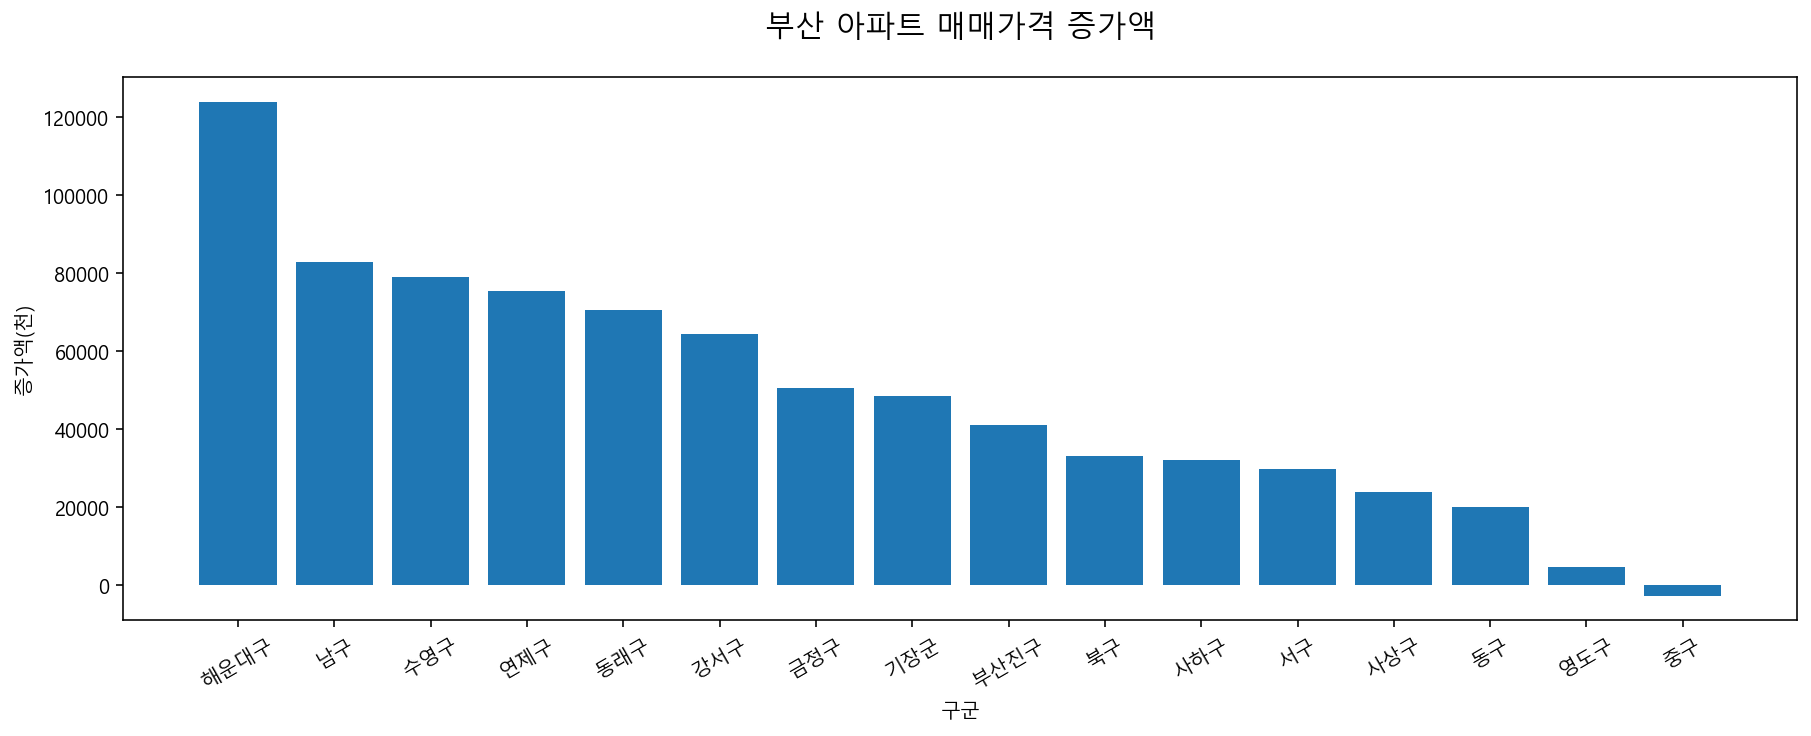

In [55]:
# 부산 지역 가격 변동 순위
tmp = A3.sort_values(by='증가액', ascending=False)


# 시각화
plt.figure(figsize=(15,5))
plt.bar(tmp['구군'], tmp['증가액'])
plt.title('부산 아파트 매매가격 증가액', fontsize=15, pad=20)
plt.xlabel('구군')
plt.ylabel('증가액(천)')
plt.xticks(rotation=30)
plt.show()




**추가) 가격 변동률 기준**

- 부산 지역 가격 변동률 기준

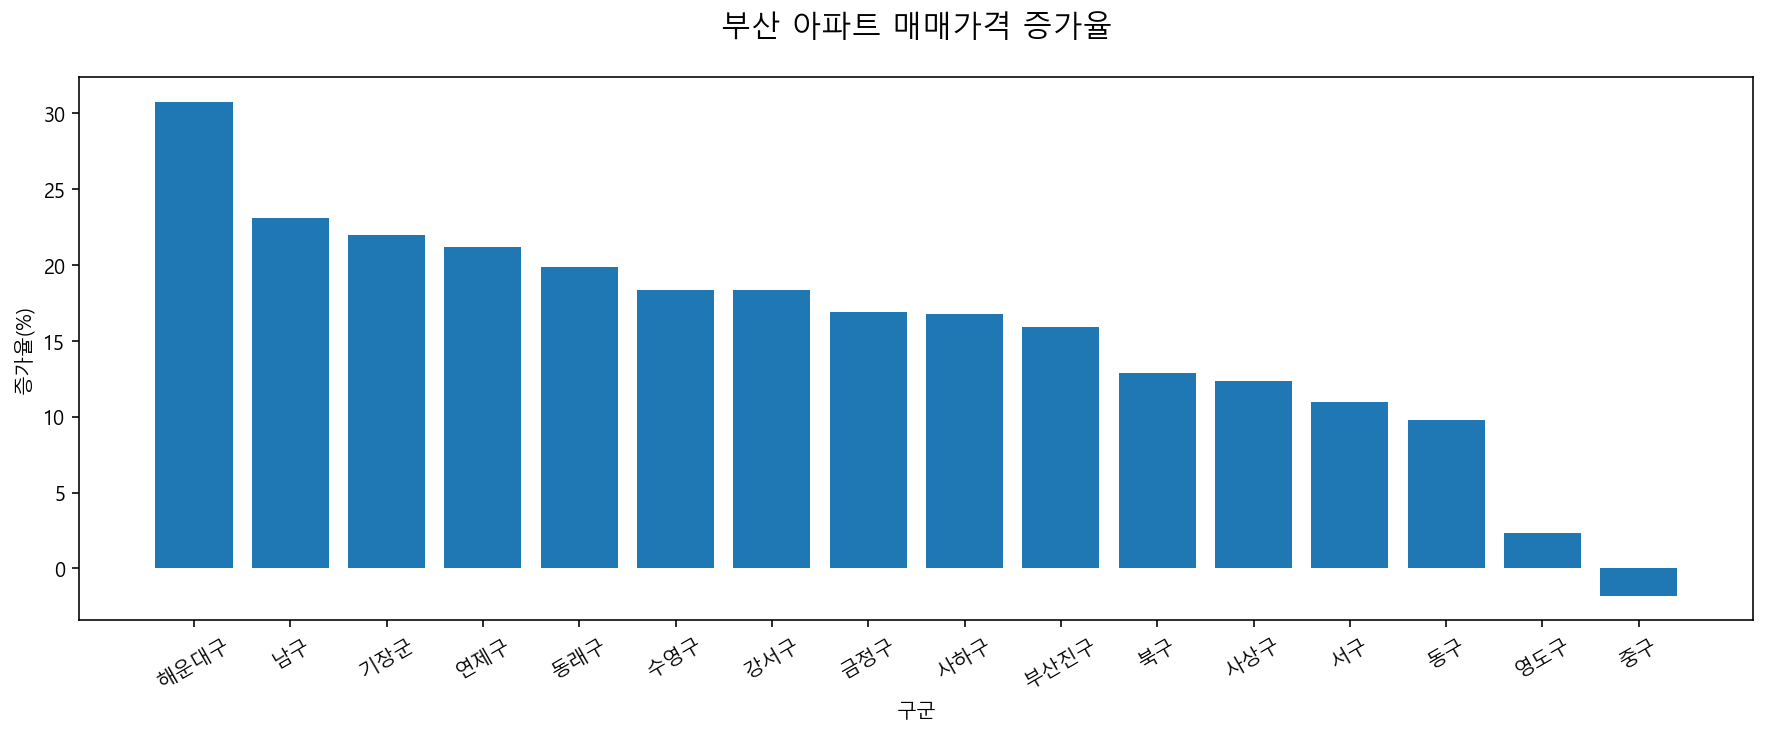

In [74]:
tmp = A3.sort_values(by='증가율', ascending=False)

plt.figure(figsize=(15,5))
plt.bar(tmp['구군'], tmp['증가율'])
plt.title('부산 아파트 매매가격 증가율', fontsize=15, pad=20)
plt.xlabel('구군')
plt.ylabel('증가율(%)')
plt.xticks(rotation=30)
plt.show()

## 5.정리

- 분석을 통해 확인한 내용을 정리합니다.

**1) 의견**

-  2020년 8월부터 2021년 7월까지 1년 간 아파트 매매가격은 주로 수도권 지역이나 신도시의 증가액이 높다.
-  동기간, 대도시에 위치해있더라도 구도심일 경우 증가율이 낮을 수 있다.
-  
-  

**2) 기타**

- 내가 사는 지역인 부산의 아파트 매매가격을 조사해봤는데 내가 살고 있는 동네는 증가액, 증가율 기준 모두 중위권에 위치해 있었다.
- 
- 
- 
- 
